 # Importing necessary dataset and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
data=pd.read_csv('..\project\heart.csv')

### Looking at the first 5 rows and descriptive statistics of the dataset

In [3]:
data.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Check whether there are any null values and data types of the columns

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Since data types of these columns should be category, their data types converted to category.

In [6]:
categoric=['sex','cp','fbs','restecg','exng','slp','caa','thall']
data[categoric]=data[categoric].apply(lambda x:x.astype('category'))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trtbps    303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalachh  303 non-null    int64   
 8   exng      303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slp       303 non-null    category
 11  caa       303 non-null    category
 12  thall     303 non-null    category
 13  output    303 non-null    int64   
dtypes: category(8), float64(1), int64(5)
memory usage: 17.8 KB


#### In order to use these columns in our model, these categoric variables are turned into dummy variables.

In [7]:
data=pd.get_dummies(data,drop_first=True)
data

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
301,57,130,131,115,1.2,0,1,0,0,0,...,1,1,0,1,0,0,0,0,0,1


#### Whether there is correlation between variables is checked and heat map of it is generated.

In [8]:
correlation=data.corr()
correlation

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.225439,-0.098447,-0.147399,-0.059432,0.047516,...,0.096801,0.177201,-0.192580,0.179284,0.226491,0.162243,-0.122378,0.063758,-0.135891,0.110752
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.144931,-0.056769,-0.081851,-0.045107,0.151343,...,0.067616,0.025207,-0.087472,-0.059485,0.088386,0.080109,0.019059,0.076369,-0.140712,0.109573
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.085239,-0.197912,-0.012750,-0.037918,-0.050589,...,0.067023,0.051177,-0.028054,0.018775,0.059887,0.098568,-0.095785,-0.093560,-0.004591,0.059621
thalachh,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,0.421741,-0.044020,0.248317,0.165475,0.079082,...,-0.378812,-0.419627,0.448043,-0.195502,-0.056905,-0.175506,0.060911,-0.159748,0.294801,-0.215417
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,-0.430696,0.096093,-0.277513,-0.132444,0.086959,...,0.288223,0.310986,-0.511356,-0.011613,0.218319,0.189296,-0.104998,0.104635,-0.339086,0.302145
output,-0.225439,-0.144931,-0.085239,0.421741,-0.430696,1.000000,-0.280937,0.245879,0.316742,0.086957,...,-0.436757,-0.362053,0.394066,-0.232412,-0.273998,-0.210615,0.066441,-0.106589,0.527334,-0.486112
sex_1,-0.098447,-0.056769,-0.197912,-0.044020,0.096093,-0.280937,1.000000,-0.041249,-0.116588,0.088043,...,0.141664,-0.009157,-0.014356,0.096673,-0.020571,0.066758,0.088212,0.141135,-0.376365,0.321559
cp_1,-0.147399,-0.081851,-0.012750,0.248317,-0.277513,0.245879,-0.041249,1.000000,-0.282135,-0.127412,...,-0.233863,-0.197994,0.223921,-0.059046,-0.087804,-0.082372,0.012208,-0.036496,0.207354,-0.188225
cp_2,-0.059432,-0.045107,-0.037918,0.165475,-0.132444,0.316742,-0.116588,-0.282135,1.000000,-0.181894,...,-0.271028,-0.105320,0.120276,0.023753,-0.196274,-0.021817,0.089577,-0.097775,0.210130,-0.173717
cp_3,0.047516,0.151343,-0.050589,0.079082,0.086959,0.086957,0.088043,-0.127412,-0.181894,1.000000,...,-0.093384,0.009321,-0.044421,-0.058710,0.041972,-0.076192,-0.037125,0.033404,0.009998,-0.022554


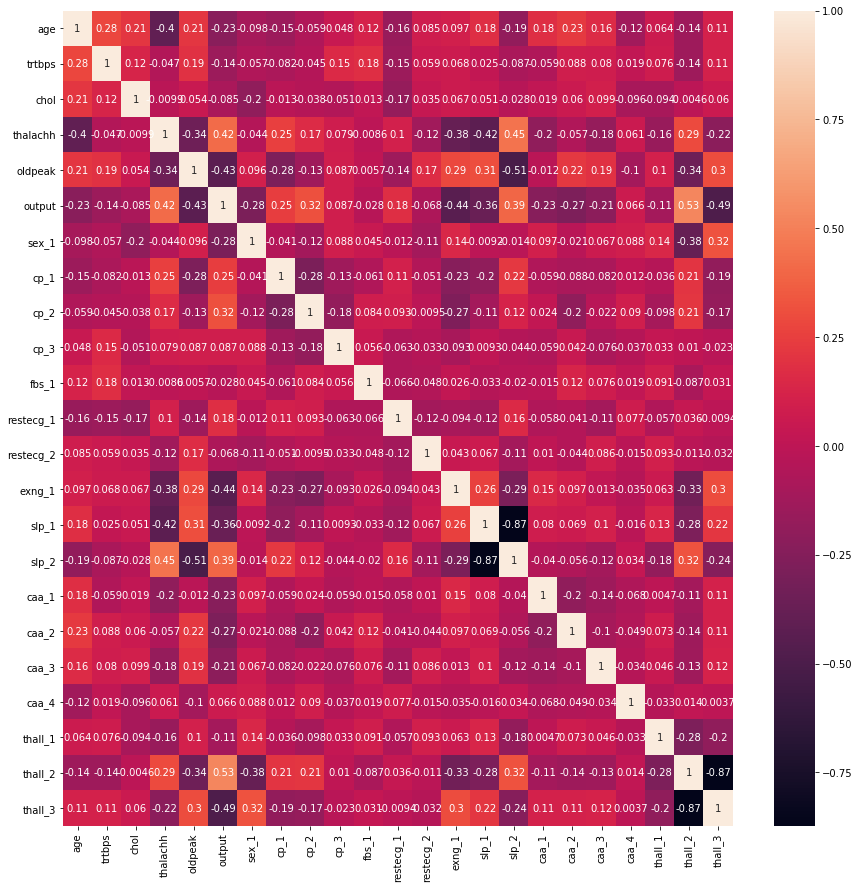

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(correlation,annot=True)

#### The columns that have correlation higher than 80% are discarded to have model with better performance.

In [10]:
correlated_features=[]
for i in range(len(correlation.columns)):
    for j in range(i):
        if abs(correlation.iloc[i,j])>0.8:
            correlated_features.append(correlation.columns[i])

correlated_features

['slp_2', 'thall_3']

In [11]:
data=data.drop(correlated_features,axis=1)

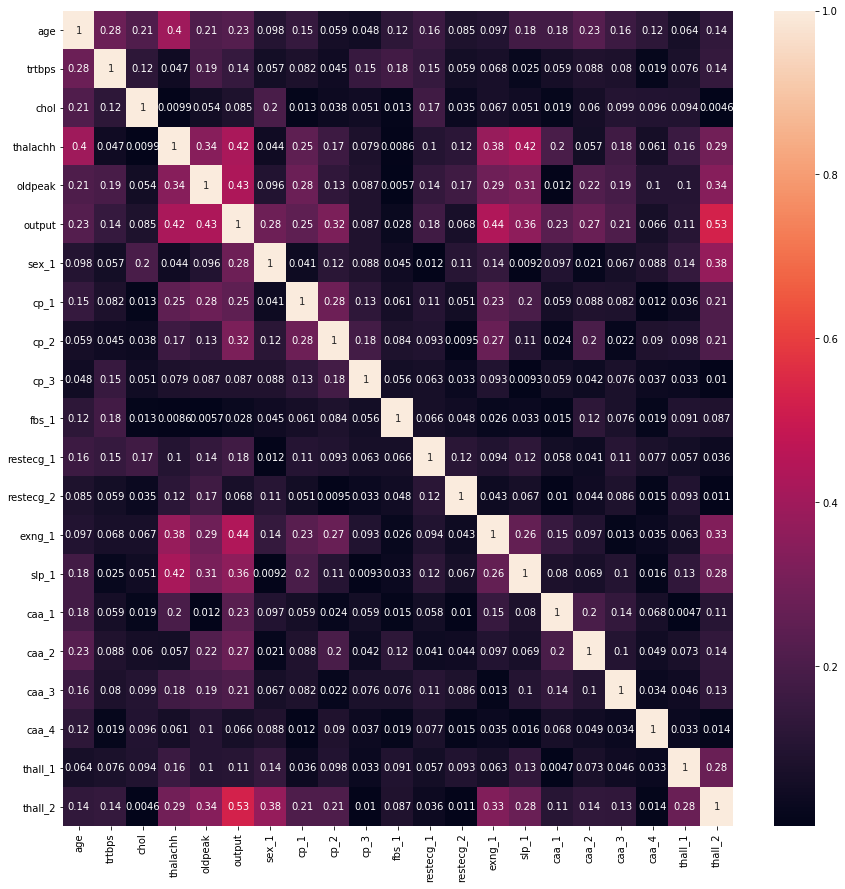

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr().abs(),annot=True)

#### The columns that are most correlated with the target variable are investigated 

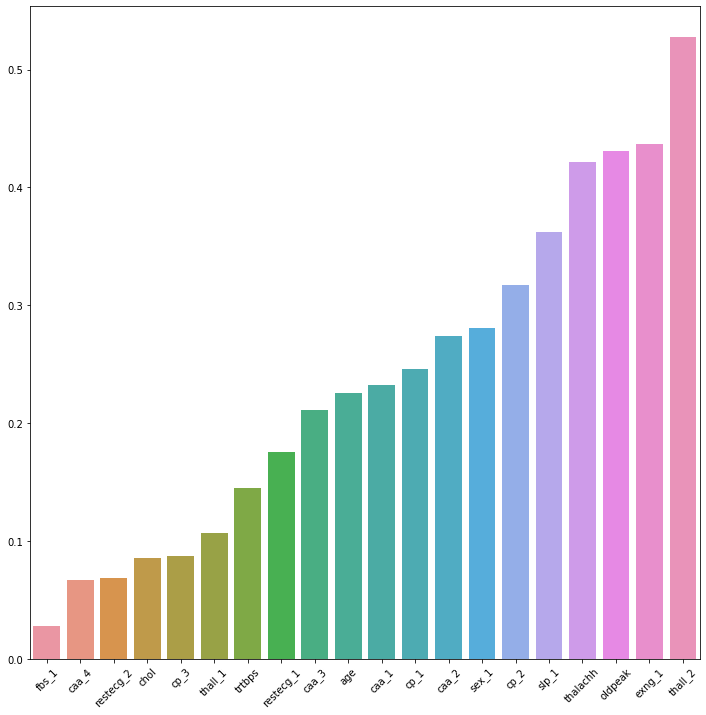

In [13]:
corr_with_output=data.iloc[:,data.columns!='output'].corrwith(data['output']).abs().sort_values()
plt.figure(figsize=(12,12))
plt.xticks(rotation=45)
sns.barplot(x=corr_with_output.index,y=corr_with_output.values)

12 variables are selected in order to fasten the model as much as possible without harming it 

In [14]:
feat=corr_with_output.abs().nlargest(12).index
feat

Index(['thall_2', 'exng_1', 'oldpeak', 'thalachh', 'slp_1', 'cp_2', 'sex_1',
       'caa_2', 'cp_1', 'caa_1', 'age', 'caa_3'],
      dtype='object')

### Train test split

In [15]:
y=data['output']
X=data[feat]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True)

In [16]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(242, 12) (61, 12) (242,) (61,)


In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   thall_2   303 non-null    uint8  
 1   exng_1    303 non-null    uint8  
 2   oldpeak   303 non-null    float64
 3   thalachh  303 non-null    int64  
 4   slp_1     303 non-null    uint8  
 5   cp_2      303 non-null    uint8  
 6   sex_1     303 non-null    uint8  
 7   caa_2     303 non-null    uint8  
 8   cp_1      303 non-null    uint8  
 9   caa_1     303 non-null    uint8  
 10  age       303 non-null    int64  
 11  caa_3     303 non-null    uint8  
dtypes: float64(1), int64(2), uint8(9)
memory usage: 9.9 KB


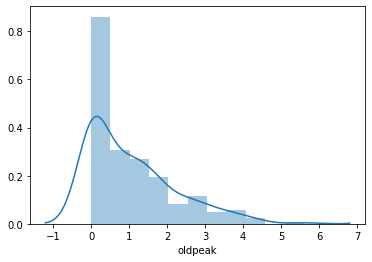

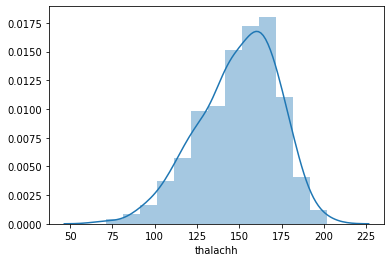

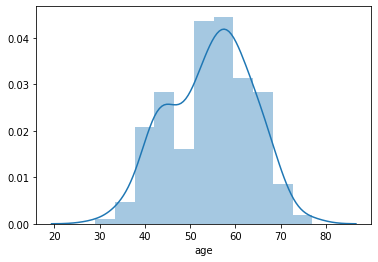

In [18]:
for i in X_train.columns:
    if X_train[i].dtype=='int64' or X_train[i].dtype=='float64':
        sns.distplot(X_train[i])
        plt.show()

### StandardScaler is applied in order to bring all variables in similar bases

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

Three different model is tried to see which one has better performance

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [21]:
def print_metrics(model,y_train=y_train,X_train=X_train,y_test=y_test,X_test=X_test):
    print('\n',model,accuracy_score(y_train,model.predict(X_train)),accuracy_score(y_test,model.predict(X_test)),\
    '\n','Train set:','\n',classification_report(y_train,model.predict(X_train)),confusion_matrix(y_train,model.predict(X_train)),'\n',\
         'Test set:','\n',classification_report(y_test,model.predict(X_test)),confusion_matrix(y_test,model.predict(X_test)))

In [22]:
import warnings
warnings.filterwarnings("ignore")
for ml in (LogisticRegression(),SVC(),DecisionTreeClassifier()):
    ml.fit(X_train,y_train)
    print_metrics(ml)


 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 0.871900826446281 0.8360655737704918 
 Train set: 
               precision    recall  f1-score   support

           0       0.89      0.83      0.86       112
           1       0.86      0.91      0.88       130

    accuracy                           0.87       242
   macro avg       0.87      0.87      0.87       242
weighted avg       0.87      0.87      0.87       242
 [[ 93  19]
 [ 12 118]] 
 Test set: 
               precision    recall  f1-score   support

           0       0.83      0.77      0.80        26
           1       0.84      0.89      0.86        35

    accuracy                           0.84        61
   macro avg       0.84      0.83     

Support Vector Machines algorithm is chosen since Decision Tree classifier is overfitting SVC has better performance than the Logistic Regression in its base model.

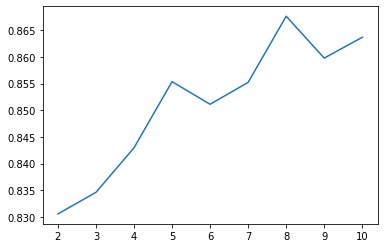

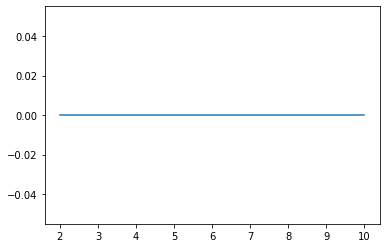

In [35]:
from sklearn.model_selection import cross_val_score
cvs,means,stds=[i for i in range(2,11)],[],[]
for i in cvs:
    a=cross_val_score(SVC(),X_train,y_train,cv=i,scoring='accuracy').mean()
    means.append(a.mean())
    stds.append(a.std())
sns.lineplot(cvs,scores_cv)
plt.show()
sns.lineplot(cvs,stds)

As cross validation sets' scores deviate when SVC is used, cross validation should be used

#### Hyperparameter tuning is done on Logistic Regression using GridSearchCV

In [24]:
from sklearn.model_selection import GridSearchCV
model=SVC()
model_params={'C':[0.01,0.1,1,10,100],'kernel':['linear','poly','rbf','sigmoid'],'degree':[1,2,3,4]}

In [25]:
gscv=GridSearchCV(model,model_params,cv=5,scoring='accuracy',return_train_score=True)

In [26]:
gscv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'degree': [1, 2, 3, 4],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [27]:
gscv.best_params_,gscv.best_score_

({'C': 10, 'degree': 4, 'kernel': 'poly'}, 0.8596938775510203)

In [28]:
print_metrics(gscv)


 GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'degree': [1, 2, 3, 4],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0) 0.9710743801652892 0.7213114754098361 
 Train set: 
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       112
           1       0.96      0.99      0.97       130

    accuracy                    